In [364]:
#Import all the libraries required for the Case Study

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

#Extend the view for the number of columns and rows 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [365]:
#Let us read and display the Application data
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [366]:
#Size of Application Data
df.size

37516342

In [367]:
#To understand number of rows and columns in Application data
df.shape

(307511, 122)

In [368]:
#Concise summary of a DataFrame
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [369]:
# Lets find out missing Values
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [370]:
# Lets find out the percentage of missing Values so that we can remove the columns which has nearly 50% or more null values
k = 100*(df.isnull().sum())/307511
k.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

##### There are around 49 columns with nearly 50% or more null values. They are arranged in the Descending order for better readability. Removing the 49 columns and then again finding out best suited columns for the analysis which is a tedious process. Thus Looking at the above table we can directly select the columns which would be of great interest ignoring the columns having 50% or more null values

##### Looking at the above observation we will select the following variables. 
SK_ID_CURR,
TARGET,
NAME_CONTRACT_TYPE,
CODE_GENDER,
FLAG_OWN_CAR,
FLAG_OWN_REALTY,
CNT_CHILDREN,
AMT_INCOME_TOTAL,
AMT_CREDIT,
DEF_60_CNT_SOCIAL_CIRCLE,
AMT_GOODS_PRICE,
NAME_INCOME_TYPE,
NAME_EDUCATION_TYPE,
NAME_FAMILY_STATUS,
NAME_HOUSING_TYPE,
REGION_POPULATION_RELATIVE,
DAYS_BIRTH,
DAYS_EMPLOYED,
DAYS_ID_PUBLISH,
FLAG_MOBIL,
FLAG_EMP_PHONE,
FLAG_CONT_MOBILE,
NAME_TYPE_SUITE,
CNT_FAM_MEMBERS,
ORGANIZATION_TYPE,
AMT_REQ_CREDIT_BUREAU_QRT

In [371]:
#Selection of Attributes 
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE','NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_QRT']]
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,2.0,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,1,1,1,Unaccompanied,1.0,Business Entity Type 3,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,0.0,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,1,1,1,Family,2.0,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,0.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,1,1,1,Unaccompanied,1.0,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,0.0,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,1,1,1,Unaccompanied,2.0,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,0.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,1,1,1,Unaccompanied,1.0,Religion,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,0.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-1982,1,1,1,Unaccompanied,1.0,Services,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,0.0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4090,1,0,1,Unaccompanied,1.0,XNA,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,0.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-5150,1,1,1,Unaccompanied,1.0,School,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,0.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-931,1,1,1,Unaccompanied,2.0,Business Entity Type 1,0.0


In [372]:
df.shape

(307511, 26)

In [373]:
#Mean, Std, min, max, count
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_QRT
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,306490.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,0.100049,5.383962e+05,0.020868,-16036.995067,63815.045904,-2994.202373,0.999997,0.819889,0.998133,2.152665,0.265474
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,0.362291,3.694465e+05,0.013831,4363.988632,141275.766519,1509.450419,0.001803,0.384280,0.043164,0.910682,0.794056
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,0.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,0.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,0.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,1.000000,3.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,24.000000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,1.000000,1.000000,1.000000,20.000000,261.000000


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

#### We have observed from the above information that there are 7 float and 9 integer values. before we change the data type of the variable lets find out the missing value percentage from the data set

In [375]:
# Lets find out the percentage of missing Values so that we can remove the columns which has nearly 50% or more null values
m = 100*(df.isnull().sum())/307511
m.sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
CNT_FAM_MEMBERS                0.000650
NAME_INCOME_TYPE               0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
NAME_EDUCATION_TYPE            0.000000
ORGANIZATION_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_CONT_MOBILE               0.000000


#### We have observed that there are total 5 attributes with the missing values - Name_Type_Suite (0.42%), Amt_req_Credit_Bureau (13%), Amt_Goods_Price (0.09%), DEF_60_CNT_SOCIAL_CIRCLE (0.33%) and Cnt_Fam_Members (0.00065%)

#### There are multiple columns in which we need to change the datatype to classify the data. 

In [376]:
#Changing data type for few attributes with no null values
convert_dict = {'SK_ID_CURR': object, 'TARGET': object, 'AMT_INCOME_TOTAL': int, 'FLAG_MOBIL' : object, 'FLAG_EMP_PHONE' : object, 'FLAG_CONT_MOBILE' : object}   
df = df.astype(convert_dict)


#### Now lets check the datatype for attributes again to verify if all the necessary changes are done

In [377]:
#Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  object 
 1   TARGET                      307511 non-null  object 
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  int64  
 8   AMT_CREDIT                  307511 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

#### Now lets replace the missing values with the best matric
     Name_Type_Suite               Mode (unacommpanied as it is maximum occurance)
     AMT_REQ_CREDIT_BUREAU_QRT     Mode (Maximum occurance - 0)
     AMT_GOODS_PRICE               0 (While comparing it with Annuty we found the missing value to be 0)
     DEF_60_CNT_SOCIAL_CIRCLE      Median (There will be no much change to the avg value)
     CNT_FAM_MEMBERS               Median (As the family members can be well defined using Median)

In [378]:
df.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [379]:
# Replacing NaN values with unaccompanied
df["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace = True)

In [380]:
df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [381]:
# Replacing NaN values with 0
df["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0, inplace = True)

In [382]:
df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [383]:
# Replacing NaN values with 0
df['AMT_GOODS_PRICE'].fillna(0, inplace = True)

In [384]:
df.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [385]:
df.DEF_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [386]:
# Replacing NaN values with median ie 0
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)

In [387]:
df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [388]:
df.CNT_FAM_MEMBERS.median()

2.0

In [389]:
# Replacing NaN values with median ie 2
df['CNT_FAM_MEMBERS'].fillna(2, inplace = True)

In [390]:
#Checking for Null Values
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_CONT_MOBILE              0
NAME_TYPE_SUITE               0
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

#### Now we can see that there are no null values present in the entire df dataframe. Lets change the datatype of few more variables
    'AMT_GOODS_PRICE': int
    'AMT_REQ_CREDIT_BUREAU_QRT' : int
    'DEF_60_CNT_SOCIAL_CIRCLE' : int

In [394]:
#Changing data type for few attributes
convert_dict = {'AMT_GOODS_PRICE': int, 'AMT_REQ_CREDIT_BUREAU_QRT': int, 'DEF_60_CNT_SOCIAL_CIRCLE': int, 'CNT_FAM_MEMBERS' : int}   
df = df.astype(convert_dict)

In [395]:
#Changing the float variable with 2 decimal points
df.REGION_POPULATION_RELATIVE = df.REGION_POPULATION_RELATIVE.round(2)
df.AMT_CREDIT = df.AMT_CREDIT.round(2)

#### Changing  negetive attributes to absolute values for following datasets
    DAYS_BIRTH	
    DAYS_EMPLOYED	
    DAYS_ID_PUBLISH

In [398]:
df.DAYS_BIRTH = df.DAYS_BIRTH.abs()

In [399]:
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.abs()

In [400]:
df.DAYS_ID_PUBLISH = df.DAYS_ID_PUBLISH.abs()

In [401]:
#Viewing the dataframe
df.head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,2,351000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,2120,1,1,1,Unaccompanied,1,Business Entity Type 3,0
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,0,135000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,2531,1,1,1,Unaccompanied,1,Government,0
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,0,297000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,2437,1,1,1,Unaccompanied,2,Business Entity Type 3,0
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,0,513000,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,3458,1,1,1,Unaccompanied,1,Religion,0
5,100008,0,Cash loans,M,N,Y,0,99000,490495.5,0,454500,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,477,1,1,1,"Spouse, partner",2,Other,1
6,100009,0,Cash loans,F,Y,Y,1,171000,1560726.0,0,1395000,Commercial associate,Higher education,Married,House / apartment,0.04,13778,3130,619,1,1,1,Unaccompanied,3,Business Entity Type 3,1
7,100010,0,Cash loans,M,Y,Y,0,360000,1530000.0,0,1530000,State servant,Higher education,Married,House / apartment,0.00,18850,449,2379,1,1,1,Unaccompanied,2,Other,0
8,100011,0,Cash loans,F,N,Y,0,112500,1019610.0,0,913500,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,20099,365243,3514,1,0,1,Children,2,XNA,0
9,100012,0,Revolving loans,M,N,Y,0,135000,405000.0,0,405000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,14469,2019,3992,1,1,1,Unaccompanied,1,Electricity,0


#### Checking for outliers in 
    CNT_CHILDREN
    DAYS_EMPLOYED
    AMT_GOODS_PRICE
    CNT_FAM_MEMBERS
    AMT_INCOME_TOTAL
    AMT_CREDIT

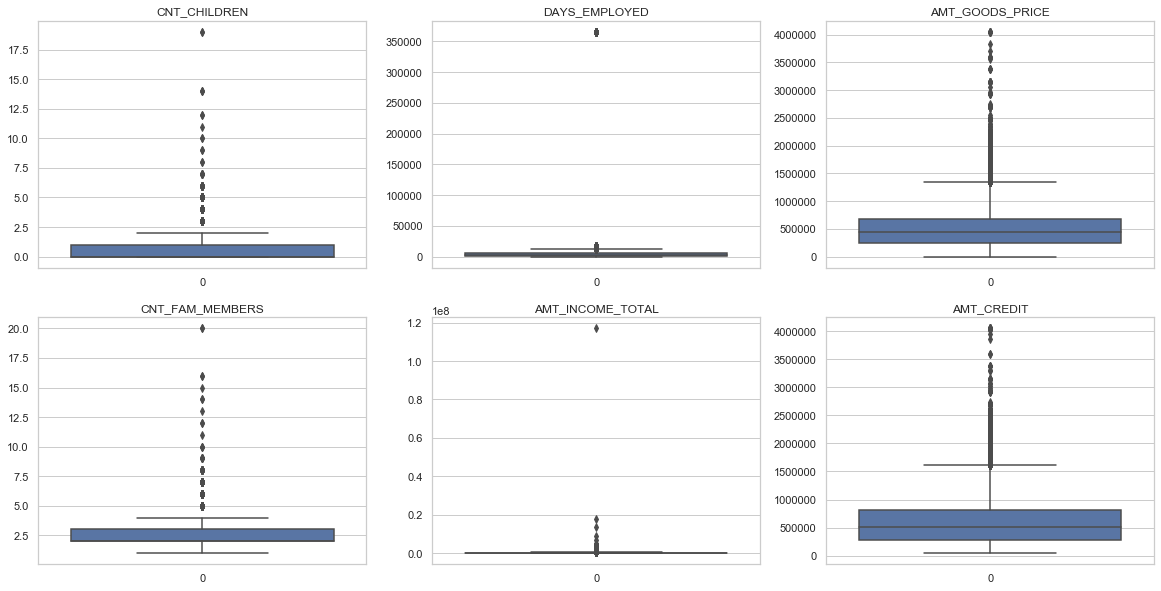

In [402]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize=(20,10))
#fig, (ax1, ax2, ax3) = plt.subplots(2,3,figsize=(10,8)
# plt.figure(figsize = (9,7))
y_title_margin = 1.2
axs[0][0].set_title("CNT_CHILDREN")
axs[0][1].set_title("DAYS_EMPLOYED")
axs[0][2].set_title("AMT_GOODS_PRICE")
axs[1][0].set_title("CNT_FAM_MEMBERS")
axs[1][1].set_title("AMT_INCOME_TOTAL")
axs[1][2].set_title("AMT_CREDIT")
sns.boxplot(data=df.CNT_CHILDREN, ax=axs[0][0])
sns.boxplot(data=df.DAYS_EMPLOYED, ax=axs[0][1])
sns.boxplot(data=df.AMT_GOODS_PRICE, ax=axs[0][2])
sns.boxplot(data=df.CNT_FAM_MEMBERS, ax=axs[1][0])
sns.boxplot(data=df.AMT_INCOME_TOTAL, ax=axs[1][1])
sns.boxplot(data=df.AMT_CREDIT, ax=axs[1][2])

plt.show()

#### Comments on the outliers

### Binning of continuous variables
    AMT_GOODS_PRICE
    AMT_CREDIT
    AMT_INCOME_TOTAL

In [403]:
df['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.379095e+05
std      3.696338e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [404]:
# Binning for AMT_GOODS_PRICE
df['AMT_GOODS_PRICE_b'] = pd.cut(df.AMT_GOODS_PRICE, [0, 200000, 400000, 600000, 800000, 4100000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])



In [405]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [406]:
# Binning for AMT_GOODS_PRICE
df['AMT_CREDIT_b'] = pd.cut(df.AMT_GOODS_PRICE, [40000, 200000, 400000, 600000, 800000, 4100000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])


In [407]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [408]:
# Binning for AMT_GOODS_PRICE
df['AMT_INCOME_TOTAL_b'] = pd.cut(df.AMT_GOODS_PRICE, [20000, 70000, 120000, 170000, 220000, 120000000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])


In [ ]:
df['AMT_GOODS_PRICE_b'] = pd.cut(df.AMT_GOODS_PRICE, [0, 200000, 400000, 600000, 800000, 4100000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])
df['AMT_CREDIT_b'] = pd.cut(df.AMT_GOODS_PRICE, [40000, 200000, 400000, 600000, 800000, 4100000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])
df['AMT_INCOME_TOTAL_b'] = pd.cut(df.AMT_GOODS_PRICE, [20000, 70000, 120000, 170000, 220000, 120000000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])



In [409]:
df.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE_b,AMT_CREDIT_b,AMT_INCOME_TOTAL_b
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,2,351000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,2120,1,1,1,Unaccompanied,1,Business Entity Type 3,0,below_avg,below_avg,high
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,high,high
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,0,135000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,2531,1,1,1,Unaccompanied,1,Government,0,low,low,avg
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,0,297000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,2437,1,1,1,Unaccompanied,2,Business Entity Type 3,0,below_avg,below_avg,high
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,0,513000,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,3458,1,1,1,Unaccompanied,1,Religion,0,avg,avg,high
5,100008,0,Cash loans,M,N,Y,0,99000,490495.5,0,454500,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,477,1,1,1,"Spouse, partner",2,Other,1,avg,avg,high
6,100009,0,Cash loans,F,Y,Y,1,171000,1560726.0,0,1395000,Commercial associate,Higher education,Married,House / apartment,0.04,13778,3130,619,1,1,1,Unaccompanied,3,Business Entity Type 3,1,high,high,high
7,100010,0,Cash loans,M,Y,Y,0,360000,1530000.0,0,1530000,State servant,Higher education,Married,House / apartment,0.00,18850,449,2379,1,1,1,Unaccompanied,2,Other,0,high,high,high
8,100011,0,Cash loans,F,N,Y,0,112500,1019610.0,0,913500,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,20099,365243,3514,1,0,1,Children,2,XNA,0,high,high,high
9,100012,0,Revolving loans,M,N,Y,0,135000,405000.0,0,405000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,14469,2019,3992,1,1,1,Unaccompanied,1,Electricity,0,avg,avg,high


### Lets check the imbalance percentage for Target attribute to understand the default percentage

In [410]:
100*df.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

##### This shows that the default percentage is 8.07%
##### Now let us divide the data into two sets based on the target variable to understand the pattern between the default cases and non default cases

In [411]:
df1 = df[df['TARGET']==0]
df2 = df[df['TARGET']==1]

### Lets check both the deta sets

In [412]:
df1.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE_b,AMT_CREDIT_b,AMT_INCOME_TOTAL_b
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,high,high
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,0,135000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,2531,1,1,1,Unaccompanied,1,Government,0,low,low,avg
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,0,297000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,2437,1,1,1,Unaccompanied,2,Business Entity Type 3,0,below_avg,below_avg,high
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,0,513000,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,3458,1,1,1,Unaccompanied,1,Religion,0,avg,avg,high
5,100008,0,Cash loans,M,N,Y,0,99000,490495.5,0,454500,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,477,1,1,1,"Spouse, partner",2,Other,1,avg,avg,high
6,100009,0,Cash loans,F,Y,Y,1,171000,1560726.0,0,1395000,Commercial associate,Higher education,Married,House / apartment,0.04,13778,3130,619,1,1,1,Unaccompanied,3,Business Entity Type 3,1,high,high,high
7,100010,0,Cash loans,M,Y,Y,0,360000,1530000.0,0,1530000,State servant,Higher education,Married,House / apartment,0.00,18850,449,2379,1,1,1,Unaccompanied,2,Other,0,high,high,high
8,100011,0,Cash loans,F,N,Y,0,112500,1019610.0,0,913500,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,20099,365243,3514,1,0,1,Children,2,XNA,0,high,high,high
9,100012,0,Revolving loans,M,N,Y,0,135000,405000.0,0,405000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,14469,2019,3992,1,1,1,Unaccompanied,1,Electricity,0,avg,avg,high
10,100014,0,Cash loans,F,N,Y,1,112500,652500.0,0,652500,Working,Higher education,Married,House / apartment,0.02,10197,679,738,1,1,1,Unaccompanied,3,Medicine,0,above_avg,above_avg,high


In [413]:
df2.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE_b,AMT_CREDIT_b,AMT_INCOME_TOTAL_b
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,2,351000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,2120,1,1,1,Unaccompanied,1,Business Entity Type 3,0,below_avg,below_avg,high
26,100031,1,Cash loans,F,N,Y,0,112500,979992.0,0,702000,Working,Secondary / secondary special,Widow,House / apartment,0.02,18724,2628,1827,1,1,1,Unaccompanied,1,Business Entity Type 3,2,above_avg,above_avg,high
40,100047,1,Cash loans,M,N,Y,0,202500,1193580.0,0,855000,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,17482,1262,1029,1,1,1,Unaccompanied,2,Business Entity Type 3,0,high,high,high
42,100049,1,Cash loans,F,N,N,0,135000,288873.0,0,238500,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,13384,3597,4409,1,1,1,Unaccompanied,2,Self-employed,0,below_avg,below_avg,high
81,100096,1,Cash loans,F,N,Y,0,81000,252000.0,1,252000,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,24794,365243,4199,1,0,1,Unaccompanied,2,XNA,0,below_avg,below_avg,high
94,100112,1,Cash loans,M,Y,Y,0,315000,953460.0,0,900000,Commercial associate,Incomplete higher,Single / not married,With parents,0.03,10199,2015,1038,1,1,1,Family,1,Industry: type 4,0,high,high,high
110,100130,1,Cash loans,F,N,Y,1,157500,723996.0,0,585000,Commercial associate,Incomplete higher,Separated,House / apartment,0.01,10526,267,3190,1,1,1,Unaccompanied,2,Trade: type 2,0,avg,avg,high
138,100160,1,Cash loans,M,N,Y,0,292500,675000.0,0,675000,Working,Higher education,Married,House / apartment,0.04,16667,200,114,1,1,1,Unaccompanied,2,Business Entity Type 3,0,above_avg,above_avg,high
154,100181,1,Cash loans,F,N,Y,0,157500,245619.0,0,166500,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,17538,7676,1082,1,1,1,Unaccompanied,1,Business Entity Type 3,0,low,low,avg
163,100192,1,Cash loans,F,N,N,0,111915,225000.0,0,225000,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.02,7989,150,646,1,1,1,Unaccompanied,1,Trade: type 3,0,below_avg,below_avg,high


### Lets perform univariate analysis for categorical variables in both the datasets

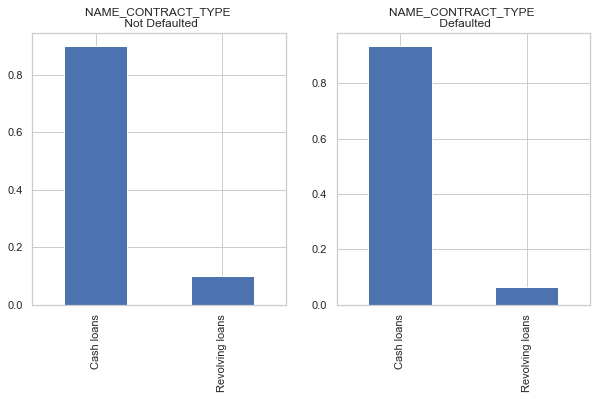

In [414]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['NAME_CONTRACT_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_CONTRACT_TYPE \n Not Defaulted')
plt.subplot(1,2,2)
df2['NAME_CONTRACT_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_CONTRACT_TYPE \n Defaulted')

plt.show()

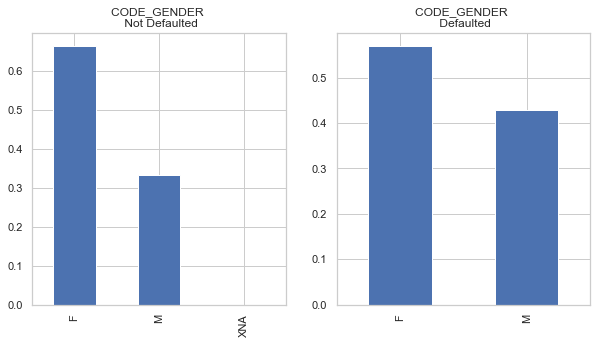

In [415]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['CODE_GENDER'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('CODE_GENDER \n Not Defaulted')
plt.subplot(1,2,2)
df2['CODE_GENDER'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('CODE_GENDER \n Defaulted')

plt.show()

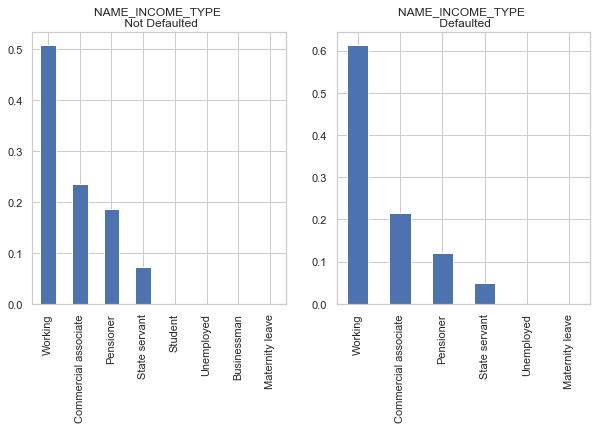

In [416]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['NAME_INCOME_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_INCOME_TYPE \n Not Defaulted')
plt.subplot(1,2,2)
df2['NAME_INCOME_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_INCOME_TYPE \n Defaulted')

plt.show()

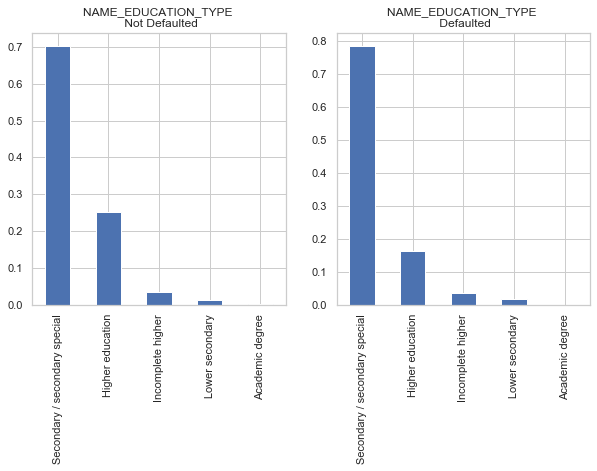

In [417]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_EDUCATION_TYPE \n Not Defaulted')
plt.subplot(1,2,2)
df2['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_EDUCATION_TYPE \n Defaulted')

plt.show()

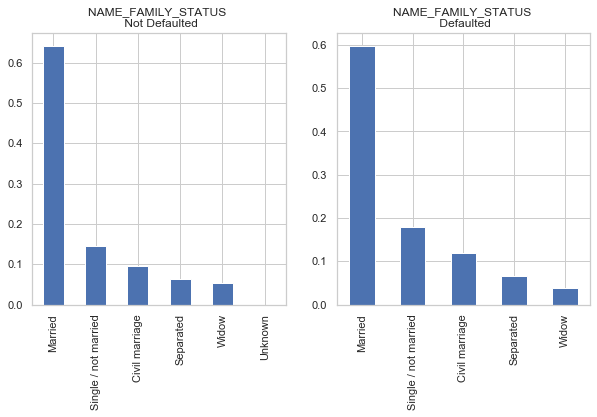

In [418]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_FAMILY_STATUS \n Not Defaulted')
plt.subplot(1,2,2)
df2['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_FAMILY_STATUS \n Defaulted')

plt.show()

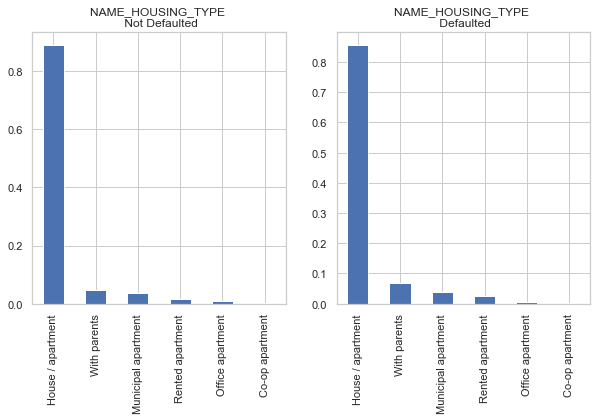

In [419]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_HOUSING_TYPE \n Not Defaulted')
plt.subplot(1,2,2)
df2['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_HOUSING_TYPE \n Defaulted')

plt.show()

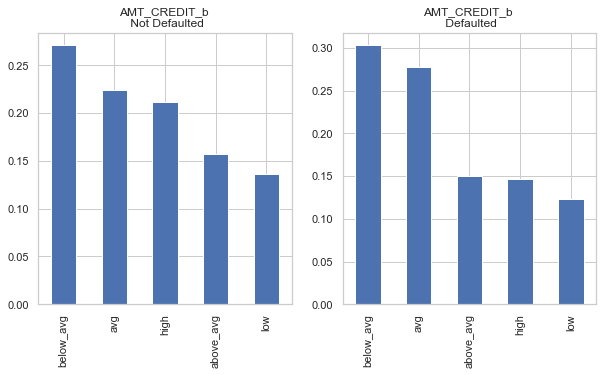

In [420]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df1['AMT_CREDIT_b'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('AMT_CREDIT_b \n Not Defaulted')
plt.subplot(1,2,2)
df2['AMT_CREDIT_b'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('AMT_CREDIT_b \n Defaulted')

plt.show()

### Lets find correlation between the variables for both df1 & df2 datasets

In [421]:
corr = df1.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10)

,Var1,Var2,Correlation,Correlation_abs
46,AMT_GOODS_PRICE,AMT_CREDIT,0.986966,0.986966
99,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
83,DAYS_EMPLOYED,DAYS_BIRTH,0.626114,0.626114
45,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349473,0.349473
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
66,DAYS_BIRTH,CNT_CHILDREN,-0.336966,0.336966
105,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.285823,0.285823
95,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663
94,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314,0.271314
77,DAYS_EMPLOYED,CNT_CHILDREN,-0.245174,0.245174


In [422]:
corr = df2.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10)

,Var1,Var2,Correlation,Correlation_abs
46,AMT_GOODS_PRICE,AMT_CREDIT,0.982854,0.982854
99,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
83,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
66,DAYS_BIRTH,CNT_CHILDREN,-0.259109,0.259109
94,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
95,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
105,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.203267,0.203267
77,DAYS_EMPLOYED,CNT_CHILDREN,-0.192864,0.192864
106,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186515,0.186515
70,DAYS_BIRTH,AMT_GOODS_PRICE,0.135516,0.135516


### Performing univariate for numerical variables in both the datasets and compare it

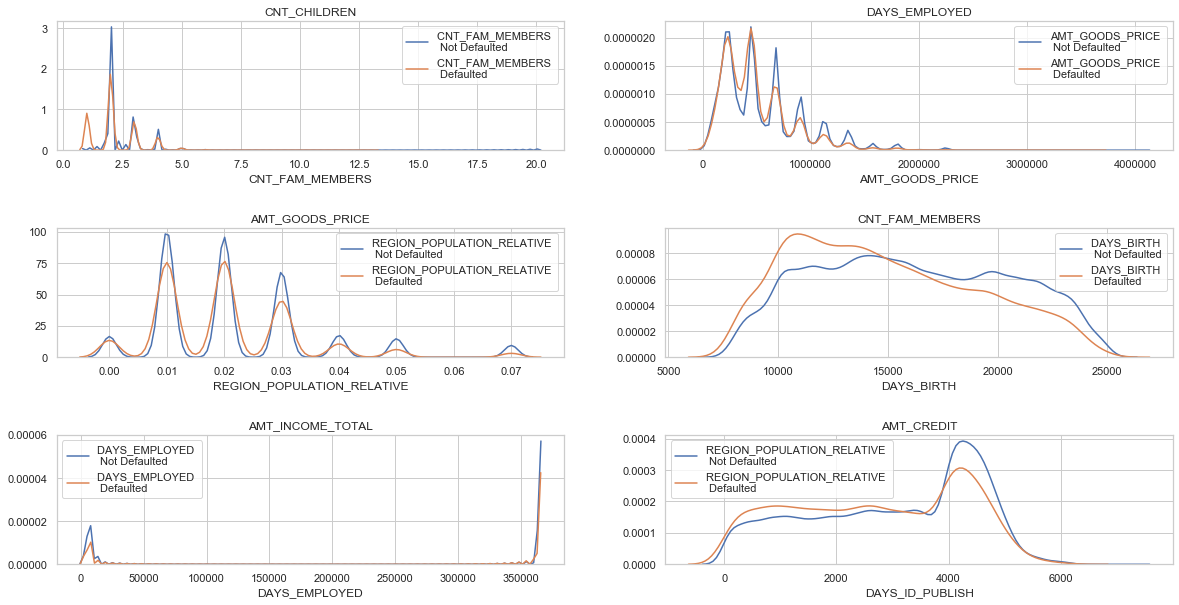

In [423]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows = 3, figsize=(20,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

axs[0][0].set_title("CNT_CHILDREN")
axs[0][1].set_title("DAYS_EMPLOYED")
axs[1][0].set_title("AMT_GOODS_PRICE")
axs[1][1].set_title("CNT_FAM_MEMBERS")
axs[2][0].set_title("AMT_INCOME_TOTAL")
axs[2][1].set_title("AMT_CREDIT")
sns.distplot(df1.CNT_FAM_MEMBERS, hist=False, label = 'CNT_FAM_MEMBERS \n Not Defaulted', ax=axs[0][0])
sns.distplot(df2.CNT_FAM_MEMBERS, hist=False, label = 'CNT_FAM_MEMBERS \n Defaulted', ax=axs[0][0])
sns.distplot(df1.AMT_GOODS_PRICE, hist=False, label = 'AMT_GOODS_PRICE \n Not Defaulted', ax=axs[0][1])
sns.distplot(df2.AMT_GOODS_PRICE, hist=False, label = 'AMT_GOODS_PRICE \n Defaulted', ax=axs[0][1])
sns.distplot(df1.REGION_POPULATION_RELATIVE, hist=False, label = 'REGION_POPULATION_RELATIVE \n Not Defaulted', ax=axs[1][0])
sns.distplot(df2.REGION_POPULATION_RELATIVE, hist=False, label = 'REGION_POPULATION_RELATIVE \n Defaulted', ax=axs[1][0])
sns.distplot(df1.DAYS_BIRTH, hist=False, label = 'DAYS_BIRTH \n Not Defaulted', ax=axs[1][1])
sns.distplot(df2.DAYS_BIRTH, hist=False, label = 'DAYS_BIRTH \n Defaulted', ax=axs[1][1])
sns.distplot(df1.DAYS_EMPLOYED, hist=False, label = 'DAYS_EMPLOYED \n Not Defaulted', ax=axs[2][0])
sns.distplot(df2.DAYS_EMPLOYED, hist=False, label = 'DAYS_EMPLOYED \n Defaulted', ax=axs[2][0])
sns.distplot(df1.DAYS_ID_PUBLISH, hist=False, label = 'REGION_POPULATION_RELATIVE \n Not Defaulted', ax=axs[2][1])
sns.distplot(df2.DAYS_ID_PUBLISH, hist=False, label = 'REGION_POPULATION_RELATIVE \n Defaulted', ax=axs[2][1])
plt.show()


### Performing Bivariate analysis for numerical variables

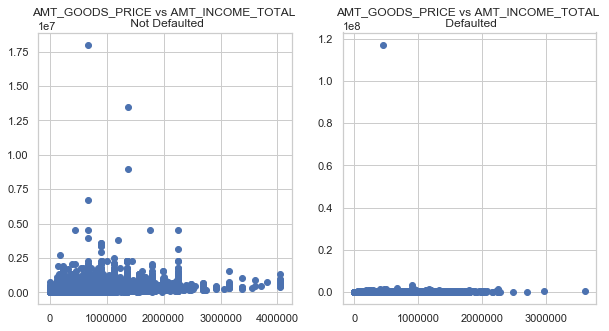

In [424]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(df1['AMT_GOODS_PRICE'], df1['AMT_INCOME_TOTAL'])
plt.title('AMT_GOODS_PRICE vs AMT_INCOME_TOTAL \n Not Defaulted')
plt.subplot(1,2,2)
plt.scatter(df2['AMT_GOODS_PRICE'], df2['AMT_INCOME_TOTAL'])
plt.title('AMT_GOODS_PRICE vs AMT_INCOME_TOTAL \n Defaulted')

plt.show()

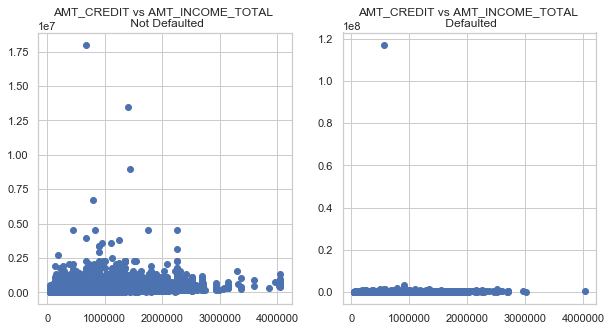

In [425]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(df1['AMT_CREDIT'], df1['AMT_INCOME_TOTAL'])
plt.title('AMT_CREDIT vs AMT_INCOME_TOTAL \n Not Defaulted')
plt.subplot(1,2,2)
plt.scatter(df2['AMT_CREDIT'], df2['AMT_INCOME_TOTAL'])
plt.title('AMT_CREDIT vs AMT_INCOME_TOTAL \n Defaulted')

plt.show()

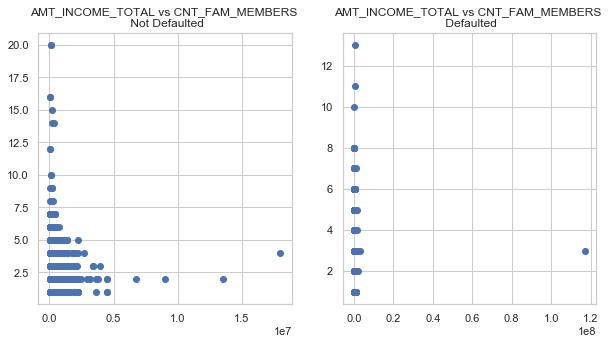

In [426]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(df1['AMT_INCOME_TOTAL'], df1['CNT_FAM_MEMBERS'])
plt.title('AMT_INCOME_TOTAL vs CNT_FAM_MEMBERS \n Not Defaulted')
plt.subplot(1,2,2)
plt.scatter(df2['AMT_INCOME_TOTAL'], df2['CNT_FAM_MEMBERS'])
plt.title('AMT_INCOME_TOTAL vs CNT_FAM_MEMBERS \n Defaulted')

plt.show()

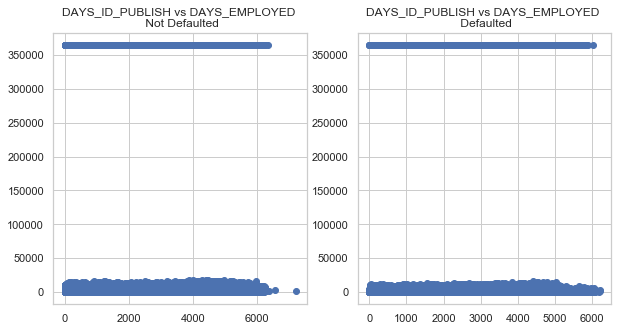

In [427]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(df1['DAYS_ID_PUBLISH'], df1['DAYS_EMPLOYED'])
plt.title('DAYS_ID_PUBLISH vs DAYS_EMPLOYED \n Not Defaulted')
plt.subplot(1,2,2)
plt.scatter(df2['DAYS_ID_PUBLISH'], df2['DAYS_EMPLOYED'])
plt.title('DAYS_ID_PUBLISH vs DAYS_EMPLOYED \n Defaulted')

plt.show()

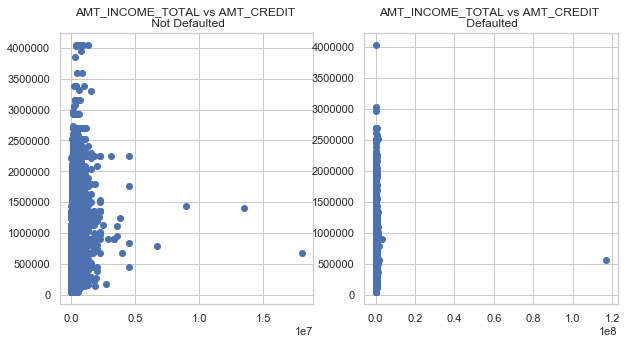

In [428]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(df1['AMT_INCOME_TOTAL'], df1['AMT_CREDIT'])
plt.title('AMT_INCOME_TOTAL vs AMT_CREDIT \n Not Defaulted')
plt.subplot(1,2,2)
plt.scatter(df2['AMT_INCOME_TOTAL'], df2['AMT_CREDIT'])
plt.title('AMT_INCOME_TOTAL vs AMT_CREDIT \n Defaulted')

plt.show()

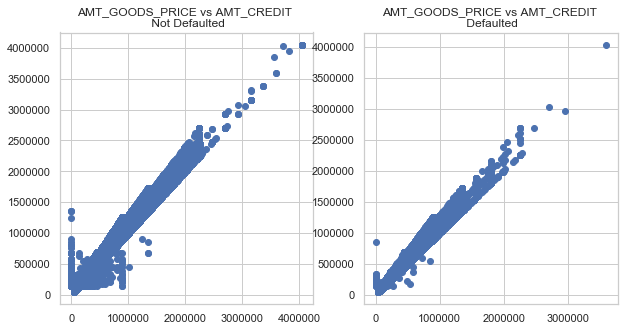

In [429]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(1,2,1)
plt.scatter(df1['AMT_GOODS_PRICE'], df1['AMT_CREDIT'])
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT \n Not Defaulted')
plt.subplot(1,2,2)
plt.scatter(df2['AMT_GOODS_PRICE'], df2['AMT_CREDIT'])
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT \n Defaulted')

plt.show()

### bivariate analysis for categorical variables

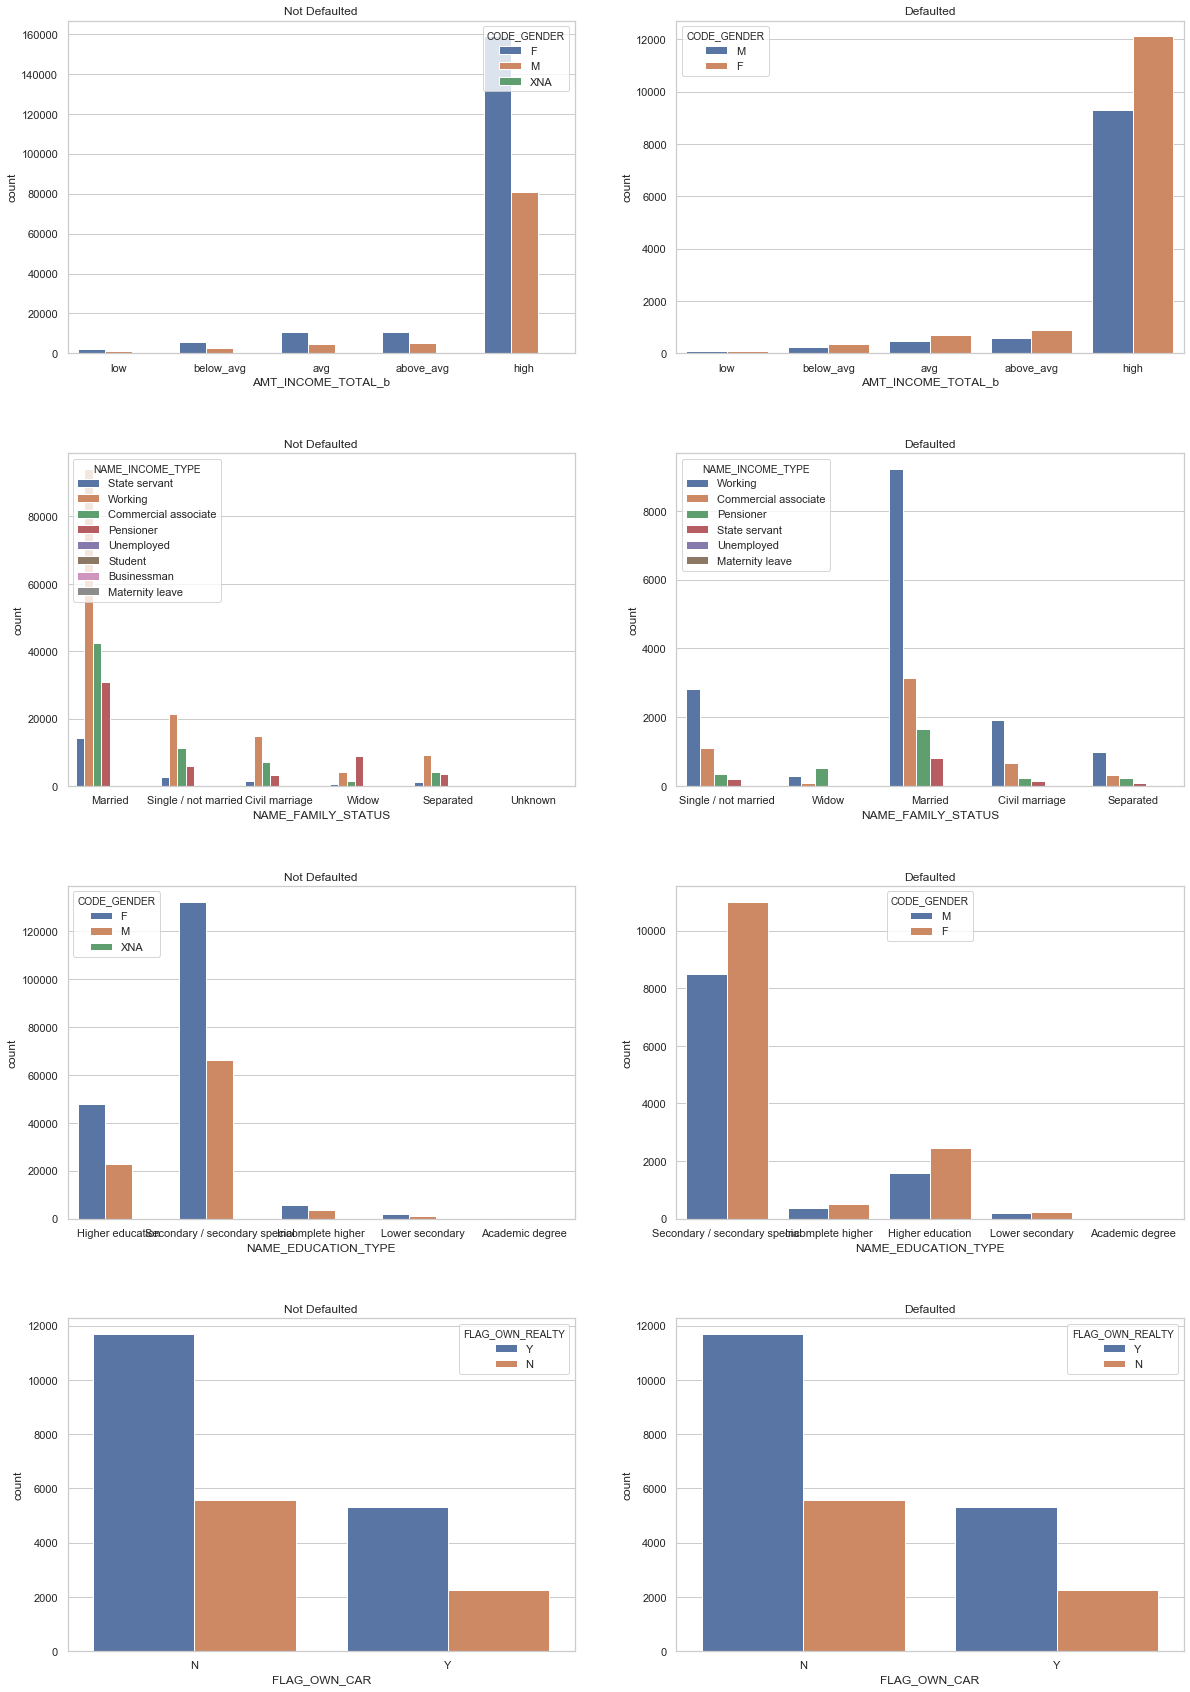

In [430]:
plt.figure(figsize = (20,30))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(4,2,1)
plt.title("Not Defaulted")
sns.countplot(x = 'AMT_INCOME_TOTAL_b', hue = 'CODE_GENDER', data = df1)

plt.subplot(4,2,2)
plt.title("Defaulted")
sns.countplot(x = 'AMT_INCOME_TOTAL_b', hue = 'CODE_GENDER', data = df2)

plt.subplot(4,2,3)
plt.title("Not Defaulted")
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_INCOME_TYPE', data = df1)

plt.subplot(4,2,4)
plt.title("Defaulted")
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_INCOME_TYPE', data = df2)

plt.subplot(4,2,5)
plt.title("Not Defaulted")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = df1)

plt.subplot(4,2,6)
plt.title("Defaulted")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = df2)

plt.subplot(4,2,7)
plt.title("Not Defaulted")
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'FLAG_OWN_REALTY', data = df2)

plt.subplot(4,2,8)
plt.title("Defaulted")
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'FLAG_OWN_REALTY', data = df2)

plt.show()

### Bivariate: Continuous-Categorical

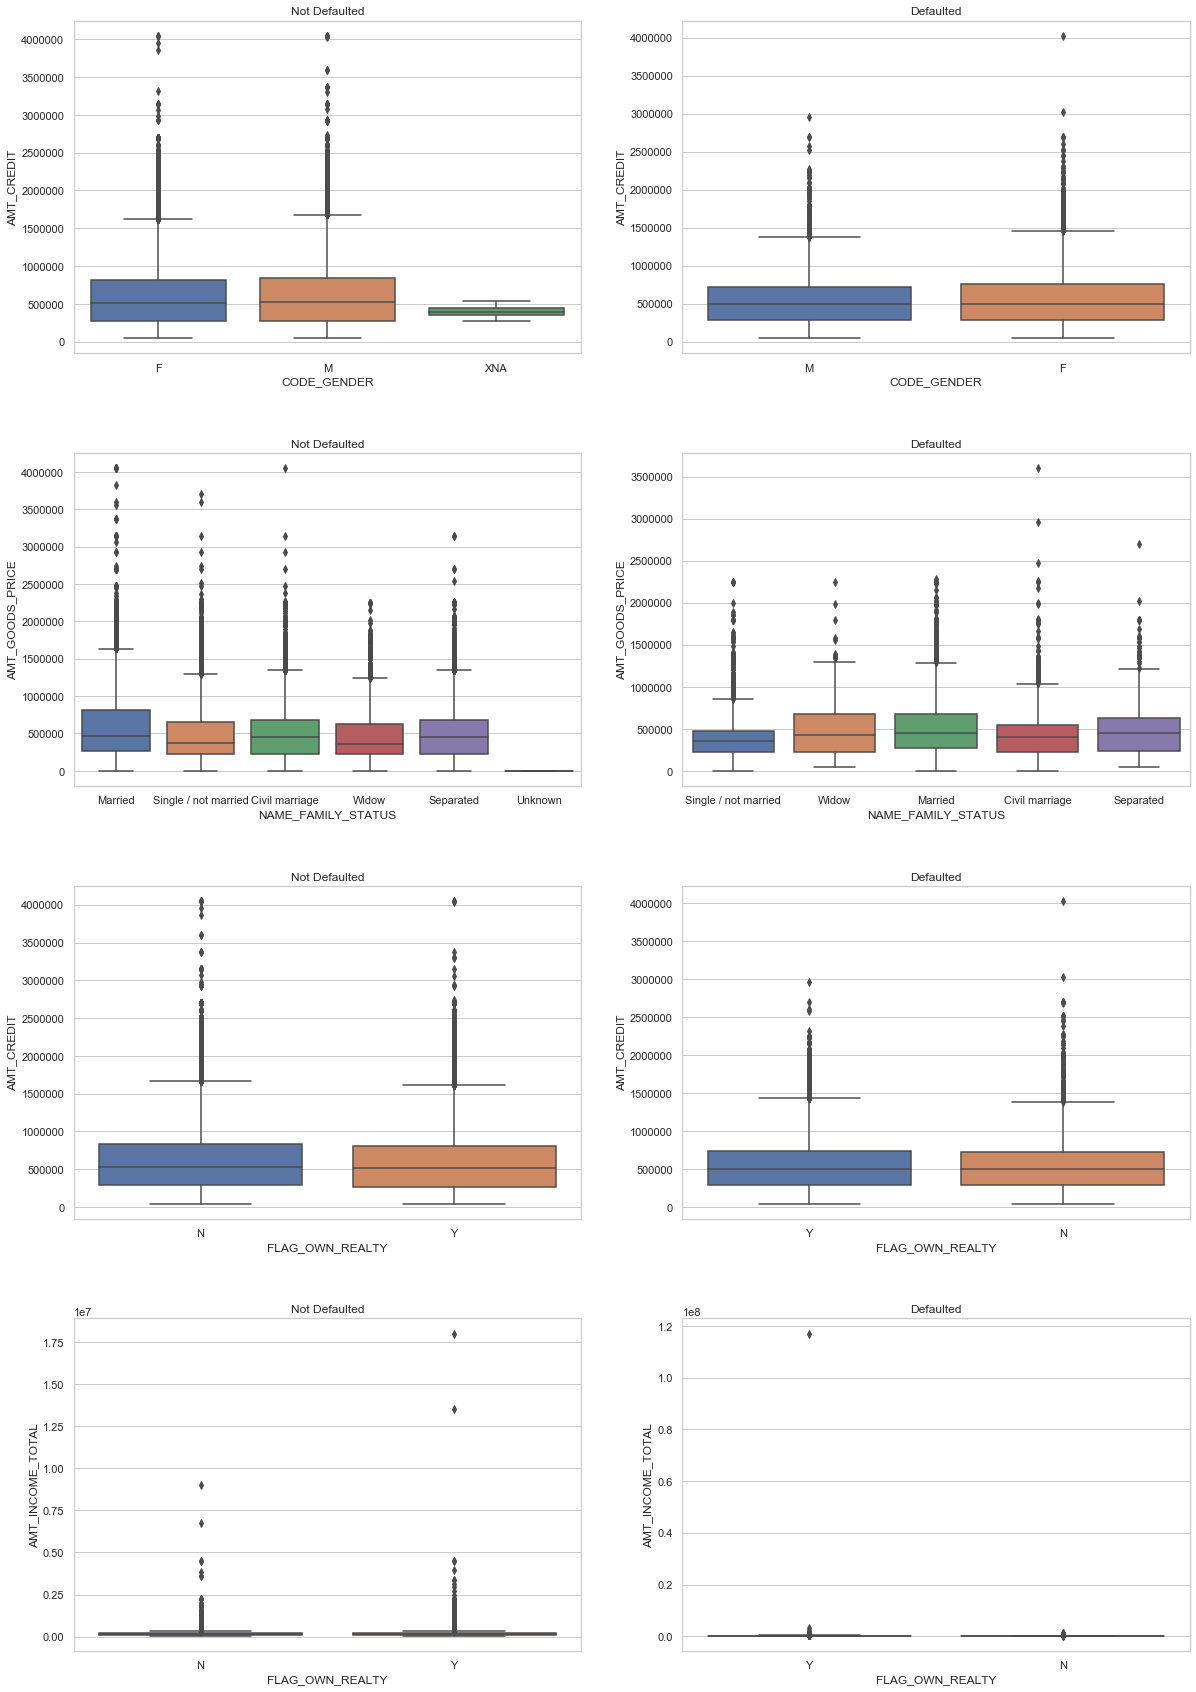

In [431]:
plt.figure(figsize = (20,30))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(4,2,1)
plt.title("Not Defaulted")
sns.boxplot(df1['CODE_GENDER'], df1['AMT_CREDIT'])

plt.subplot(4,2,2)
plt.title("Defaulted")
sns.boxplot(df2['CODE_GENDER'], df2['AMT_CREDIT'])

plt.subplot(4,2,3)
plt.title("Not Defaulted")
sns.boxplot(df1['NAME_FAMILY_STATUS'], df1['AMT_GOODS_PRICE'])

plt.subplot(4,2,4)
plt.title("Defaulted")
sns.boxplot(df2['NAME_FAMILY_STATUS'], df2['AMT_GOODS_PRICE'])

plt.subplot(4,2,5)
plt.title("Not Defaulted")
sns.boxplot(df1['FLAG_OWN_REALTY'], df1['AMT_CREDIT'])

plt.subplot(4,2,6)
plt.title("Defaulted")
sns.boxplot(df2['FLAG_OWN_REALTY'], df2['AMT_CREDIT'])

plt.subplot(4,2,7)
plt.title("Not Defaulted")
sns.boxplot(df1['FLAG_OWN_REALTY'], df1['AMT_INCOME_TOTAL'])

plt.subplot(4,2,8)
plt.title("Defaulted")
sns.boxplot(df2['FLAG_OWN_REALTY'], df2['AMT_INCOME_TOTAL'])

plt.show()

### Merging application and previous dataframes frames using SK_ID_CURR

In [432]:
dfp = pd.read_csv("previous_application.csv")
dfp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### We are using inner join to merge two datasets so that we can avoid NaN values and link all the entries depending on the SK_ID_CURR attribute

In [479]:
mergedDF111 = pd.merge(df, dfp, how='inner', on=['SK_ID_CURR'])


In [480]:
mergedDF111.head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE_x,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE_b,AMT_CREDIT_b,AMT_INCOME_TOTAL_b,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,2,351000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,2120,1,1,1,Unaccompanied,1,Business Entity Type 3,0,below_avg,below_avg,high,1038818,Consumer loans,9251.775,179055.000,179055.000,0.00,179055.000,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,high,high,1810518,Cash loans,98356.995,900000.000,1035882.000,NaN,900000.000,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,high,high,2636178,Consumer loans,64567.665,337500.000,348637.500,0.00,337500.000,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,high,high,2396755,Consumer loans,6737.310,68809.500,68053.500,6885.00,68809.500,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,0,135000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,2531,1,1,1,Unaccompanied,1,Government,0,low,low,avg,1564014,Consumer loans,5357.250,24282.000,20106.000,4860.00,24282.000,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000,312682.5,0,297000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,2437,1,1,1,Unaccompanied,2,Business Entity Type 3,0,below_avg,below_avg,high,2078043,Cash loans,24246.000,675000.000,675000.000,NaN,675000.000,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,-181,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-1

In [481]:
mergedDF111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 65 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  object  
 1   TARGET                       1413701 non-null  object  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  int64   
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   DEF_60_CNT_SOCIAL_CIRCLE     1413701 non-null  int64   
 10  AMT_GOODS_PRICE_x            1413701 non-null  int64   
 11  NAME_INCOME_TYPE             1413701 non-null  object  
 12  NAME_EDUCATION_TYPE         

In [457]:
sss = 100*(mergedDF111.isnull().sum())/307511
k.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [482]:
mergedDF = mergedDF111[[ 'SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE_x','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','NAME_TYPE_SUITE_x','CNT_FAM_MEMBERS','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_GOODS_PRICE_b','SK_ID_PREV','NAME_CONTRACT_TYPE_y','AMT_APPLICATION','AMT_CREDIT_b','AMT_INCOME_TOTAL_b','NAME_CONTRACT_STATUS']]
mergedDF

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,DEF_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,NAME_TYPE_SUITE_x,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE_b,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_b,AMT_INCOME_TOTAL_b,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,2,351000,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,2120,1,1,1,Unaccompanied,1,Business Entity Type 3,0,below_avg,1038818,Consumer loans,179055.0,below_avg,high,Approved
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,1810518,Cash loans,900000.0,high,high,Approved
2,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,2636178,Consumer loans,337500.0,high,high,Approved
3,100003,0,Cash loans,F,N,N,0,270000,1293502.5,0,1129500,State servant,Higher education,Married,House / apartment,0.00,16765,1188,291,1,1,1,Family,2,School,0,high,2396755,Consumer loans,68809.5,high,high,Approved
4,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,0,135000,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,2531,1,1,1,Unaccompanied,1,Government,0,low,1564014,Consumer loans,24282.0,low,avg,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500,675000.0,0,675000,Commercial associate,Higher education,Married,House / apartment,0.05,16856,1262,410,1,1,1,Unaccompanied,2,Business Entity Type 3,0,above_avg,2073384,Cash loans,229500.0,above_avg,high,Approved
1413697,456255,0,Cash loans,F,N,N,0,157500,675000.0,0,675000,Commercial associate,Higher education,Married,House / apartment,0.05,16856,1262,410,1,1,1,Unaccompanied,2,Business Entity Type 3,0,above_avg,1708056,Revolving loans,45000.0,above_avg,high,Refused
1413698,456255,0,Cash loans,F,N,N,0,157500,675000.0,0,675000,Commercial associate,Higher education,Married,House / apartment,0.05,16856,1262,410,1,1,1,Unaccompanied,2,Business Entity Type 3,0,above_avg,1296007,Cash loans,765000.0,above_avg,high,Refused
1413699,456255,0,Cash loans,F,N,N,0,157500,675000.0,0,675000,Commercial associate,Higher education,Married,House / apartment,0.05,16856,1262,410,1,1,1,Unaccompanied,2,Business Entity Type 3,0,above_avg,2631384,Cash loans,1170000.0,above_avg,high,Approved


In [483]:
s11 = 100*(mergedDF.isnull().sum())/len(mergedDF)
s11.sort_values(ascending=False)

AMT_CREDIT_b                  0.085449
AMT_INCOME_TOTAL_b            0.085449
AMT_GOODS_PRICE_b             0.085449
NAME_CONTRACT_STATUS          0.000000
AMT_INCOME_TOTAL              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_INCOME_TYPE              0.000000
AMT_GOODS_PRICE_x             0.000000
DEF_60_CNT_SOCIAL_CIRCLE      0.000000
AMT_CREDIT_x                  0.000000
CNT_CHILDREN                  0.000000
NAME_HOUSING_TYPE             0.000000
FLAG_OWN_REALTY               0.000000
FLAG_OWN_CAR                  0.000000
CODE_GENDER                   0.000000
NAME_CONTRACT_TYPE_x          0.000000
TARGET                        0.000000
NAME_FAMILY_STATUS            0.000000
DAYS_BIRTH                    0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_CONT_MOBILE              0.000000
NAME_TYPE_SUITE_x        

In [484]:
#Binning
df['AMT_GOODS_PRICE_b'] = pd.cut(df.AMT_GOODS_PRICE, [0, 200000, 400000, 600000, 800000, 4100000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])
df['AMT_CREDIT_b'] = pd.cut(df.AMT_GOODS_PRICE, [40000, 200000, 400000, 600000, 800000, 4100000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])
df['AMT_INCOME_TOTAL_b'] = pd.cut(df.AMT_GOODS_PRICE, [20000, 70000, 120000, 170000, 220000, 120000000], labels = ['low', 'below_avg', 'avg', 'above_avg', 'high'])




### Split the dataset depending on the default attribute

In [485]:
mergeddf1 = mergedDF[mergedDF['TARGET']==0]
mergeddf2 = mergedDF[mergedDF['TARGET']==1]

### Univariate & bivariate analysis for Name_Contract_Status attribute to understand the pattern

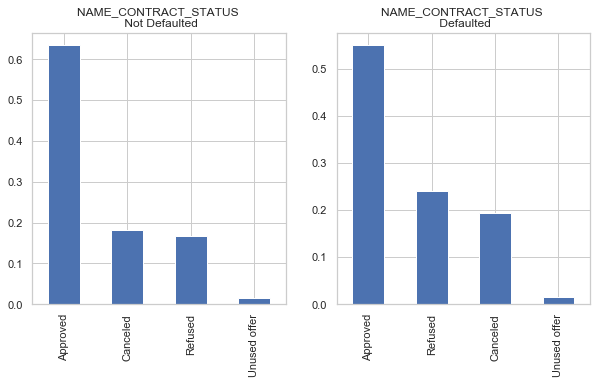

In [486]:
#Univariate Analysis
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
mergeddf1['NAME_CONTRACT_STATUS'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_CONTRACT_STATUS \n Not Defaulted')
plt.subplot(1,2,2)
mergeddf2['NAME_CONTRACT_STATUS'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('NAME_CONTRACT_STATUS \n Defaulted')

plt.show()

### If you compare the default and non default cases the approval percentage difference is just 10%

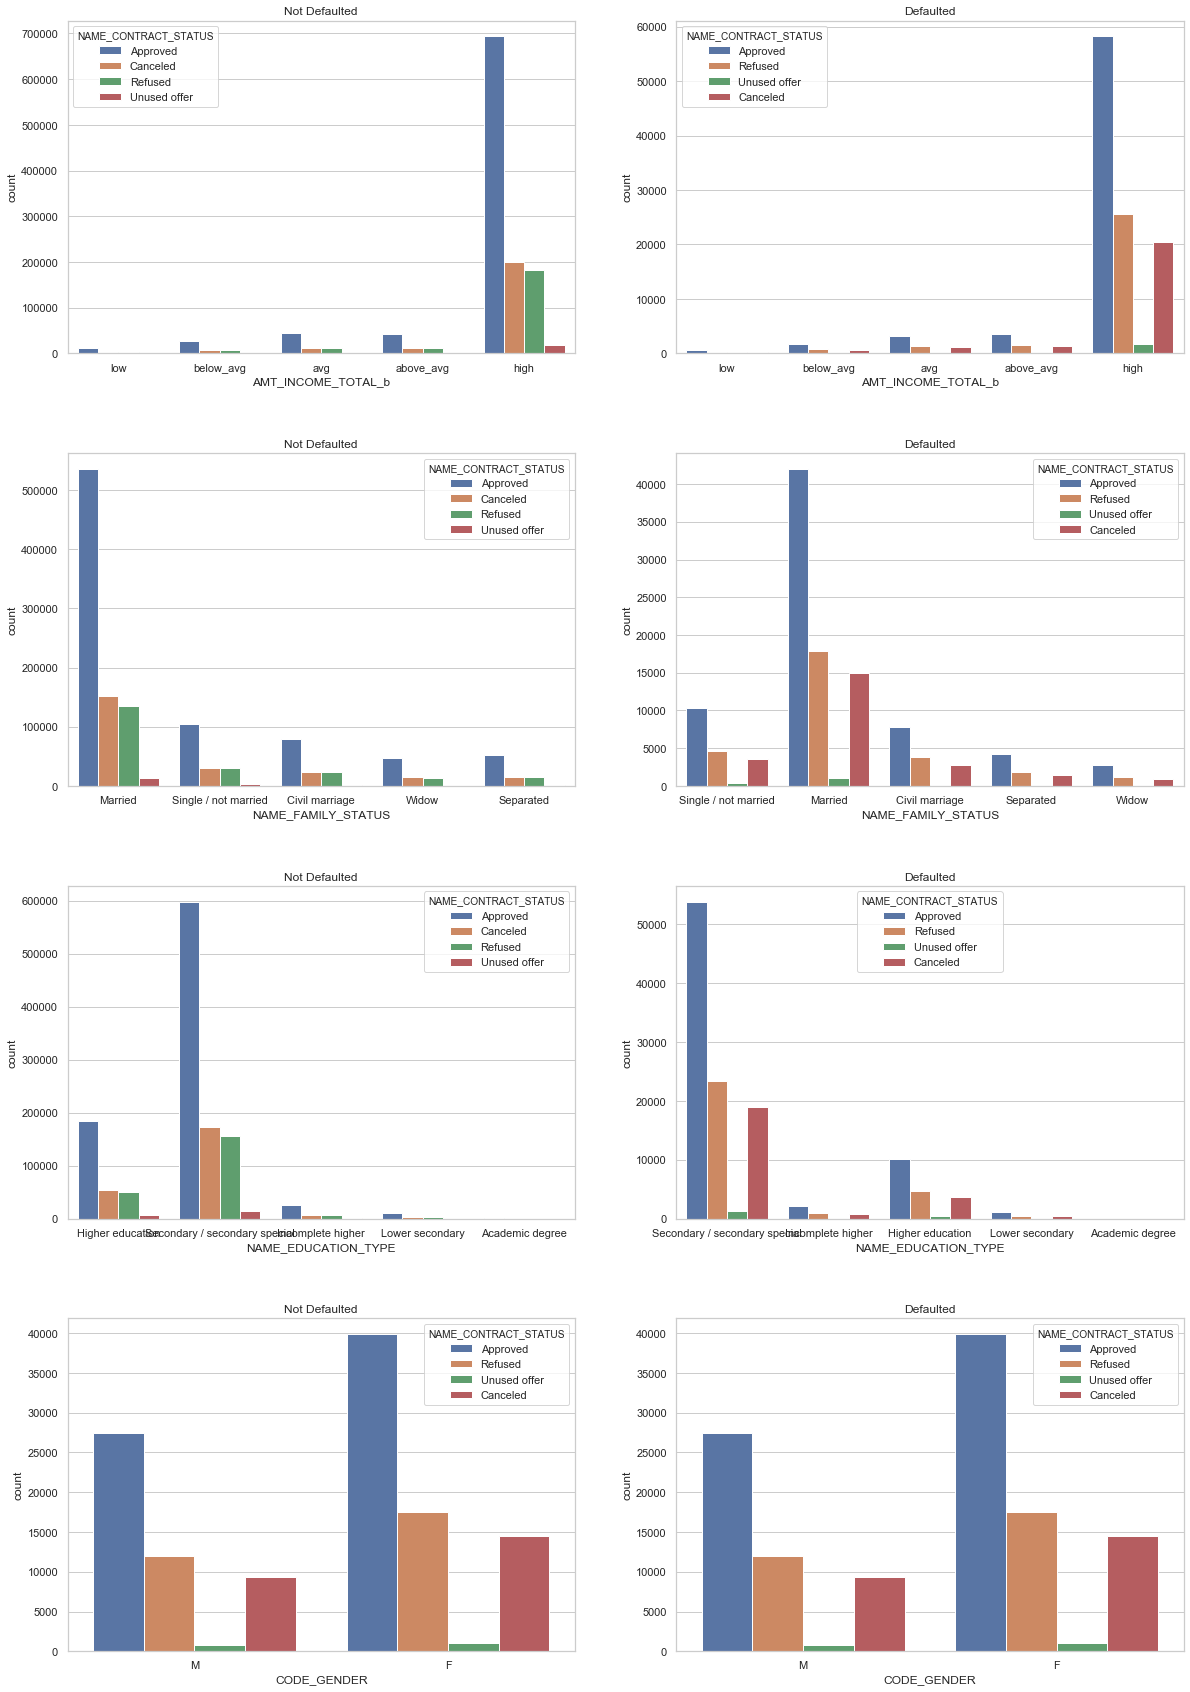

In [487]:
# Performing bivariate analysis for Categorical variables

plt.figure(figsize = (20,30))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(4,2,1)
plt.title("Not Defaulted")
sns.countplot(x = 'AMT_INCOME_TOTAL_b', hue = 'NAME_CONTRACT_STATUS', data = mergeddf1)

plt.subplot(4,2,2)
plt.title("Defaulted")
sns.countplot(x = 'AMT_INCOME_TOTAL_b', hue = 'NAME_CONTRACT_STATUS', data = mergeddf2)

plt.subplot(4,2,3)
plt.title("Not Defaulted")
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS', data = mergeddf1)

plt.subplot(4,2,4)
plt.title("Defaulted")
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS', data = mergeddf2)

plt.subplot(4,2,5)
plt.title("Not Defaulted")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = mergeddf1)

plt.subplot(4,2,6)
plt.title("Defaulted")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = mergeddf2)

plt.subplot(4,2,7)
plt.title("Not Defaulted")
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = mergeddf2)

plt.subplot(4,2,8)
plt.title("Defaulted")
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = mergeddf2)

plt.show()

In [ ]:
### Bivariate continous-categorical

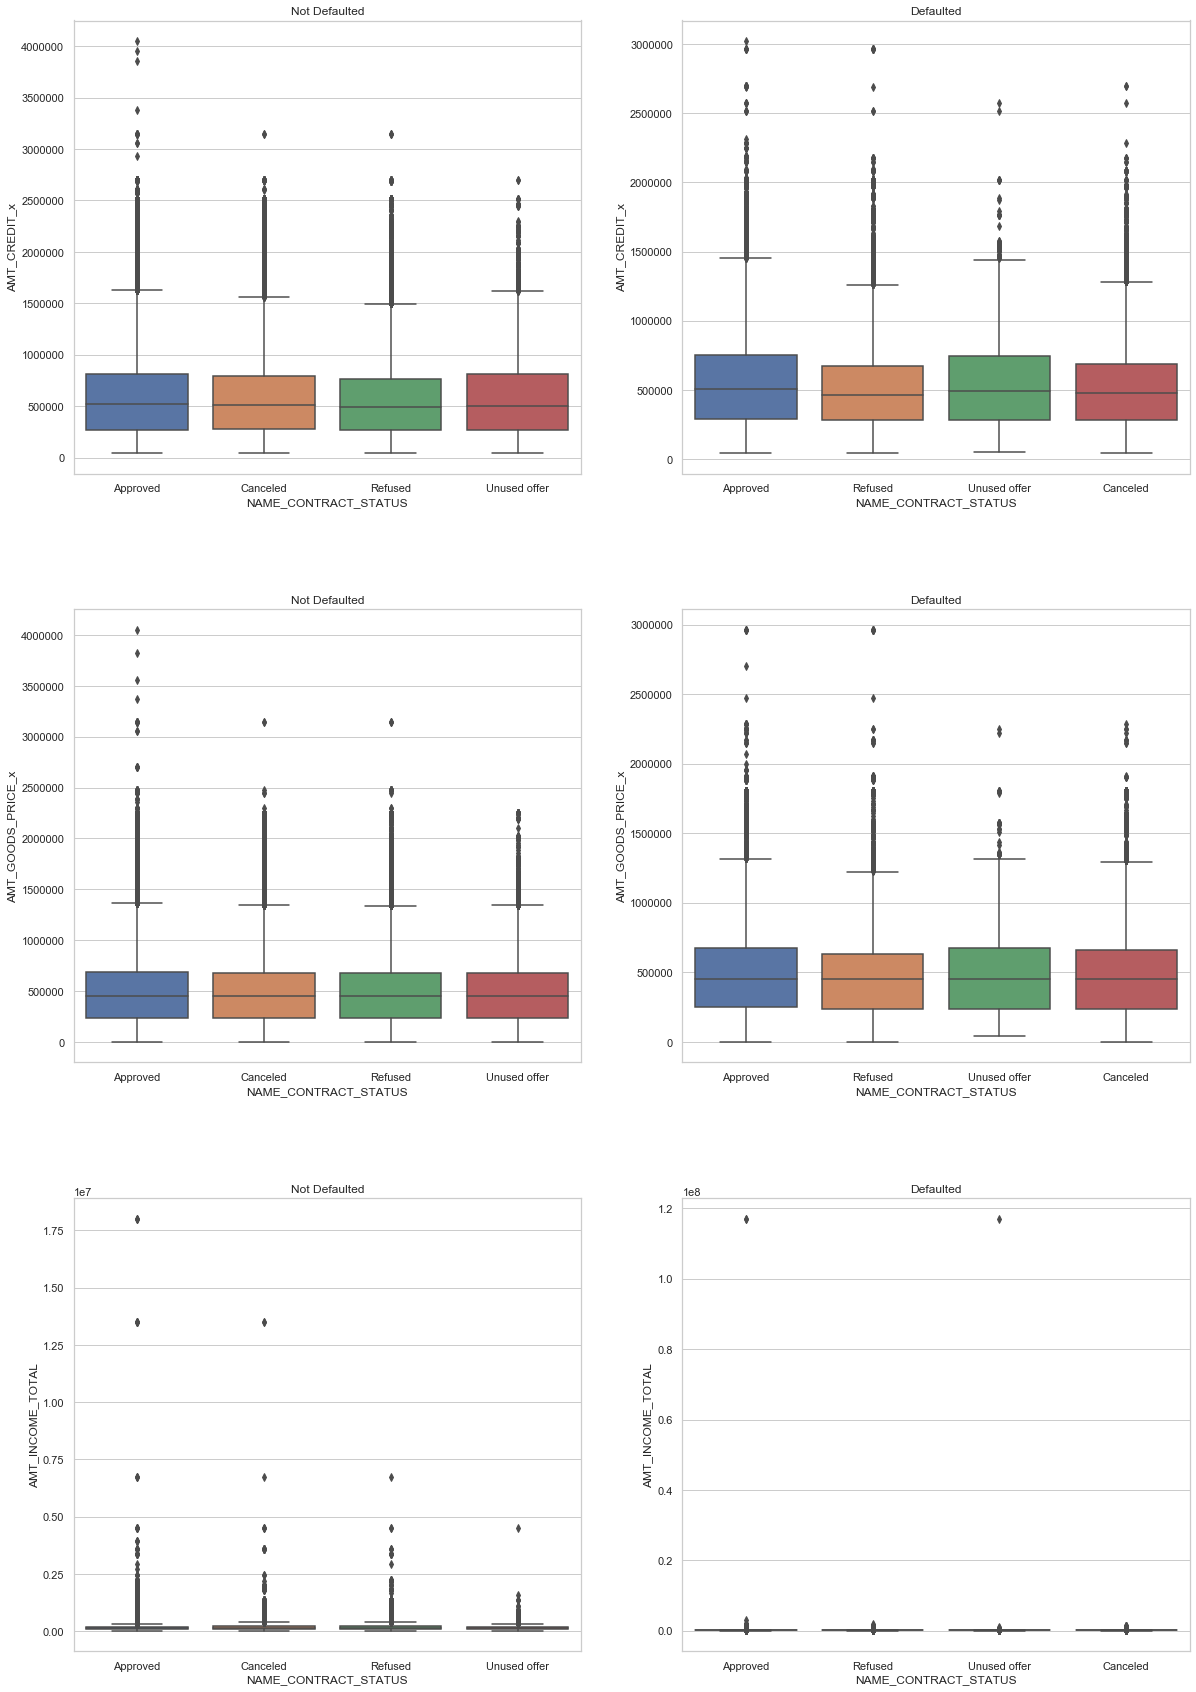

In [491]:
plt.figure(figsize = (20,30))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.subplot(3,2,1)
plt.title("Not Defaulted")
sns.boxplot(mergeddf1['NAME_CONTRACT_STATUS'], mergeddf1['AMT_CREDIT_x'])

plt.subplot(3,2,2)
plt.title("Defaulted")
sns.boxplot(mergeddf2['NAME_CONTRACT_STATUS'], mergeddf2['AMT_CREDIT_x'])

plt.subplot(3,2,3)
plt.title("Not Defaulted")
sns.boxplot(mergeddf1['NAME_CONTRACT_STATUS'], mergeddf1['AMT_GOODS_PRICE_x'])

plt.subplot(3,2,4)
plt.title("Defaulted")
sns.boxplot(mergeddf2['NAME_CONTRACT_STATUS'], mergeddf2['AMT_GOODS_PRICE_x'])

plt.subplot(3,2,5)
plt.title("Not Defaulted")
sns.boxplot(mergeddf1['NAME_CONTRACT_STATUS'], mergeddf1['AMT_INCOME_TOTAL'])

plt.subplot(3,2,6)
plt.title("Defaulted")
sns.boxplot(mergeddf2['NAME_CONTRACT_STATUS'], mergeddf2['AMT_INCOME_TOTAL'])


plt.show()